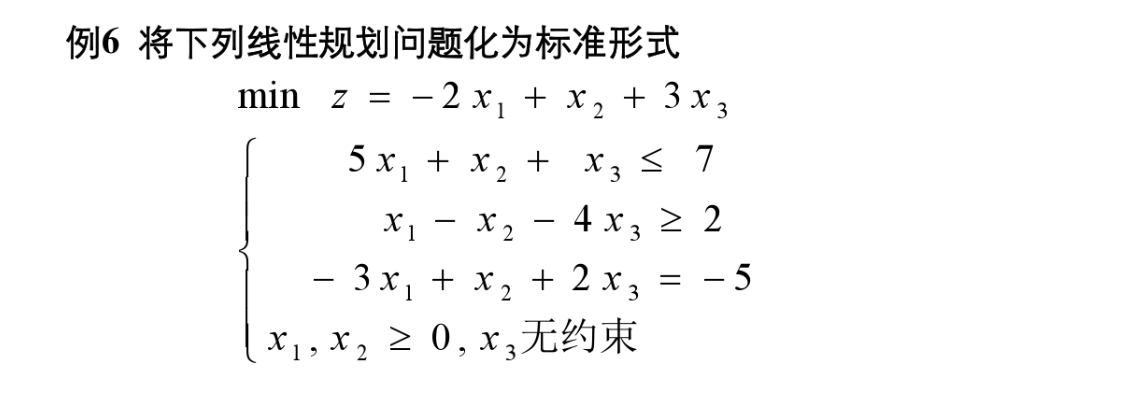

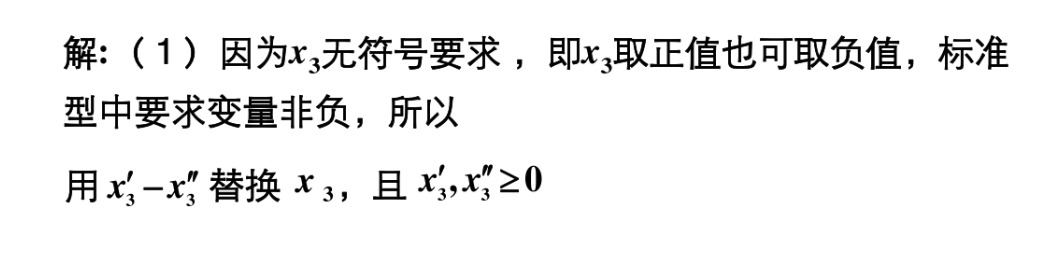

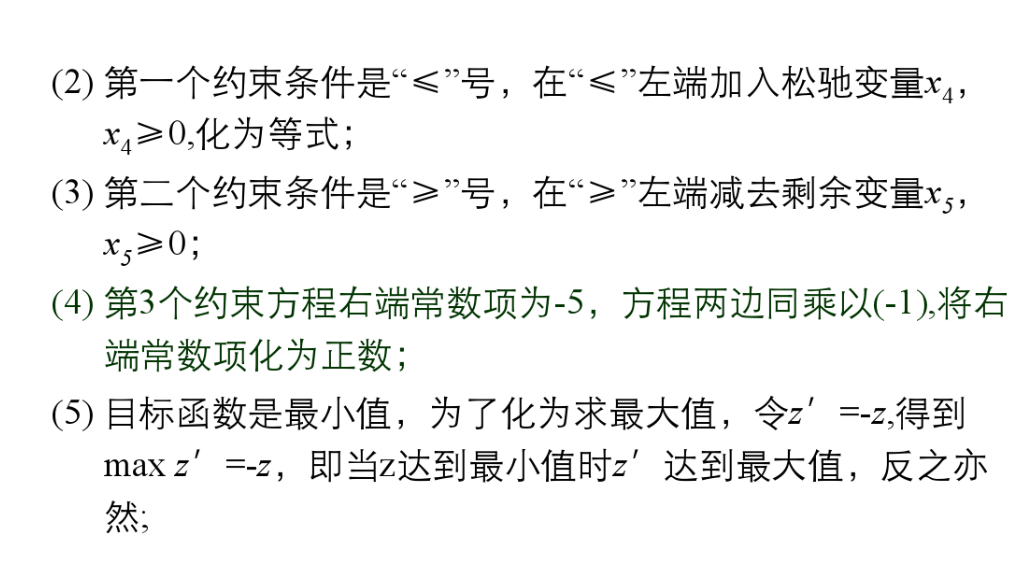

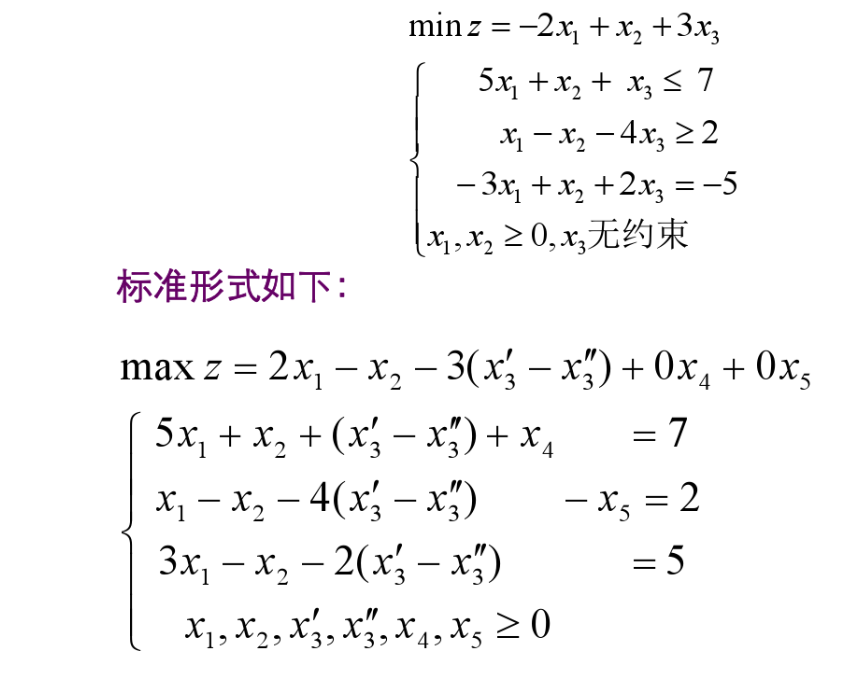

In [1]:
import numpy as np

In [2]:
class Table:
    def __init__(self):
        pass

    def set_para(self, A, b, c, base, z0):
        """
        输入LP必须已经化为标准形式
        """
        self.A = A
        self.b = b
        self.c = c
        self.z0 = z0
        self.base = base
        self.m, self.n = self.A.shape
        # self.cj=np.nan
        self.x, self.y = self.c.shape

    def build(self):
        self.table = np.zeros((self.m + 1, self.n + 1))
        self.table[:-1, :1] = self.b.T
        self.table[-1, 0] = self.z0
        self.table[:-1, 1:] = self.A
        self.table[-1, 1:] = c
        self.baseVar = base

        self.table1 = np.zeros((1, self.n))
        # self.table1[0,0]=self.cj
        self.table1[:1, 0:] = self.c

        self.table2 = np.zeros((1, self.n), dtype=int)
        self.table2[:1, 0:] = list(range(1, int(self.n + 1)))

    def is_best(self):
        for sigma_index in range(self.n):
            if sigma_index not in self.baseVar:
                sigma = self.table[-1, 1 + sigma_index]
                if sigma > 0:
                    return False
        return True

    def is_no_solution(self):
        for sigma_index in range(self.n):
            if sigma_index not in self.baseVar:
                sigma = self.table[-1, 1 + sigma_index]
                if sigma > 0:
                    no_solution_flag = True
                    for a in self.table[:-1, 1 + sigma_index]:
                        if a > 0:
                            no_solution_flag = False
                    if no_solution_flag == True:
                        return True
        return False

    def get_inVar(self):
        max_sigma = 0
        inVar = None
        for sigma_index in range(self.n):
            if sigma_index not in self.baseVar:
                sigma = self.table[-1, 1 + sigma_index]
                if sigma > max_sigma:
                    max_sigma = sigma
                    inVar = sigma_index
        return inVar

    def get_outVar(self, inVar):
        rates = []
        rates1 = []
        for nobaseVar in range(self.m):
            a = self.table[nobaseVar, inVar + 1]
            b = self.table[nobaseVar, 0]
            if a > 0:
                rate = b / a
                rates.append([rate, nobaseVar])
            if a > 0:
                rate1 = round(b / a, 2)
                rates1.append([rate1, nobaseVar])
            else:
                rate1 = '/'
                rates1.append([rate1, nobaseVar])
        print('|theta|', end='')
        for theta in range(self.m):
            if isinstance(rates1[theta][0], str):
                print('%7s' % rate1, end=' |')
            else:
                print("%7.2f" % rates1[theta][0], end=' |')
        print()
        print()
        return min(rates)[1]

    def in_out(self, inVar, outVar):
        a = self.table[outVar, inVar + 1]
        self.table[outVar, :] /= a
        for i in range(self.m + 1):
            if i != outVar:
                self.table[i, :] -= self.table[outVar, :] * self.table[i, inVar + 1]
        self.baseVar[outVar] = inVar

    def show(self):
        print('基变量/取值：', list(map(lambda n: n + 1, self.baseVar)), end='/')
        print(self.table[:-1, 0])
        print("单纯形表")

        for x1 in range(self.x):
            print('|', end=' ')
            print('     ' + "Cj" + "      " + "|", end=' ')
            for y1 in range(self.y):
                print('%6.0f' % self.table1[x1, y1], end=' ')
                print('|', end=' ')
            print()

        for x1 in range(self.x):

            print('|', end=' ')
            print('%-3s' % ("xb") + " " + "|", end='  ')
            print("Value", end=' ')
            print('|', end=' ')
            for y1 in range(self.y):
                print('    ' + 'x%d' % self.table2[x1, y1], end=' ')
                print('|', end=' ')
            # print('%6s'%'theta',end=' ')
            # aprint('|',end=' ')
            print()

        BASE = list(map(lambda n: n + 1, base))
        BASE.append('-z')
        for i in range(self.m + 1):
            print('|', end=' ')
            if type(BASE[i]) == int:
                print('%1s%-2d' % ('x', BASE[i]), end='')
            else:
                print(BASE[i], end='  ')
            if i != self.m:
                print('', end=' ')
            print('|', end=' ')
            for j in range(self.n + 1):
                print('%6.2f' % self.table[i, j], end=' ')
                print('|', end=' ')
            print()

In [3]:
class Simplex:
    def __init__(self):
        self.table = Table()

        # 0 正常，尚未得到最优解，继续迭代
        # 1 无解，无界解
        # 2 达到最优解
        self.status = 0
        self.inVar = None
        self.outVar = None

    def set_para(self, A, b, c, base, z0=0):
        self.table.set_para(A, b, c, base, z0)

    def output_result(self):
        self._main()
        if self.status == 1:
            print('=========')
            print("此问题无解，无界解")
            print('=========')
        elif self.status == 2:
            print('=================')
            print("此问题有一个最优解")
            print('=================')
        elif self.status == 3:
            print('=====================')
            print("此问题有无穷多个最优解")
            print('=====================')

    def _main(self):
        self._build_table()
        while 1:
            self.table.show()
            if self._is_best() or self._is_no_solution():
                return

            self._get_inVar()
            self._get_outVar()
            self._in_out()

    def _build_table(self):
        self.table.build()

    def _is_best(self):
        if self.table.is_best():
            self.status = 2
            return True
        return False

    def _is_no_solution(self):
        if self.table.is_no_solution():
            self.status = 1
            return True
        return False

    def _get_inVar(self):
        self.inVar = self.table.get_inVar()

    def _get_outVar(self):
        self.outVar = self.table.get_outVar(self.inVar)

    def _in_out(self):
        self.table.in_out(self.inVar, self.outVar)

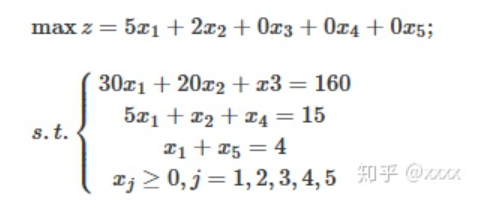

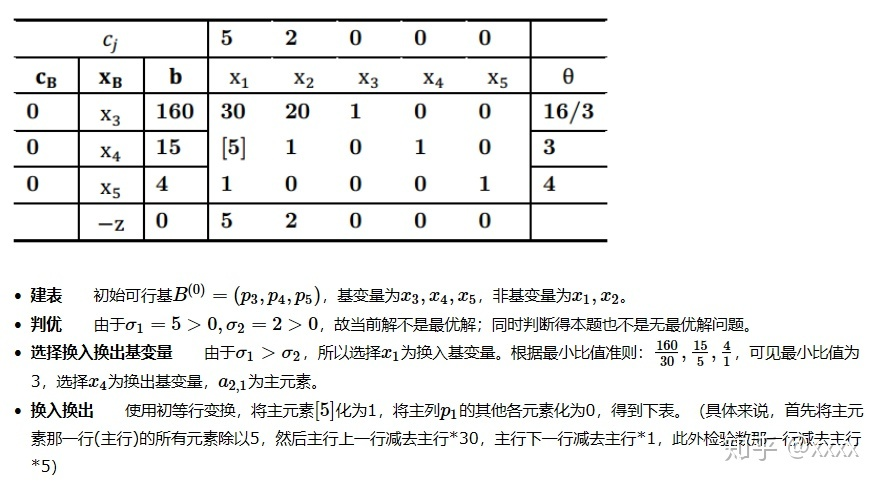

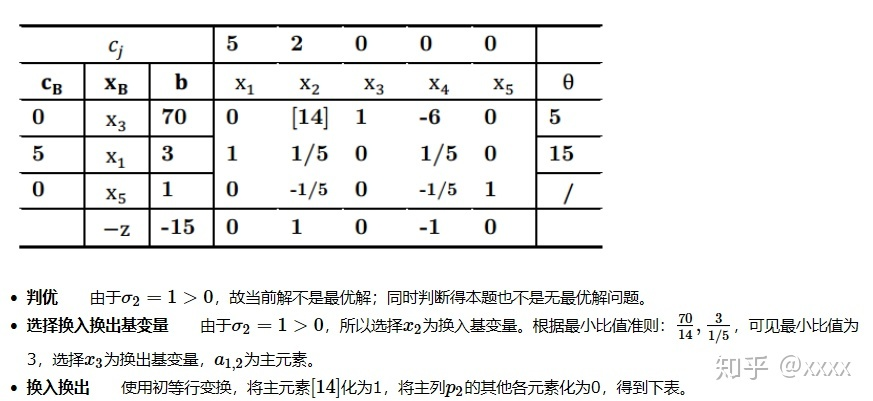

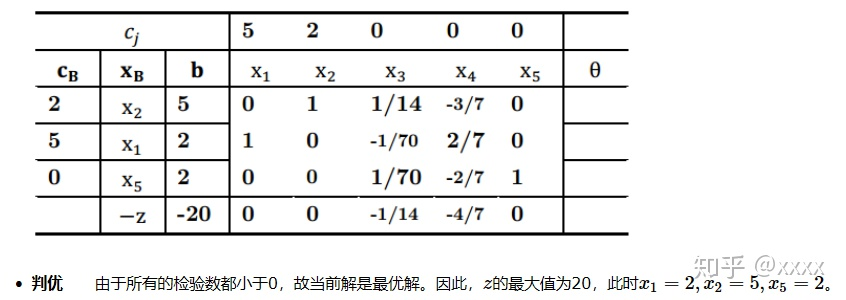

In [4]:
if 1 == 1:
    s = Simplex()
    c = np.matrix([[5, 2, 0, 0, 0]])
    
    A = np.matrix([[30, 20, 1, 0, 0],
                   [5, 1, 0, 1, 0],
                   [1, 0, 0, 0, 1]])
    
    b = np.matrix([[160, 15, 4]])
    
    base = [3, 4, 5]
    base = list(map(lambda n: n - 1, base))
    s.set_para(A, b, c, base)
    s.output_result()

基变量/取值： [3, 4, 5]/[160.  15.   4.]
单纯形表
|      Cj      |      5 |      2 |      0 |      0 |      0 | 
| xb  |  Value |     x1 |     x2 |     x3 |     x4 |     x5 | 
| x3  | 160.00 |  30.00 |  20.00 |   1.00 |   0.00 |   0.00 | 
| x4  |  15.00 |   5.00 |   1.00 |   0.00 |   1.00 |   0.00 | 
| x5  |   4.00 |   1.00 |   0.00 |   0.00 |   0.00 |   1.00 | 
| -z  |   0.00 |   5.00 |   2.00 |   0.00 |   0.00 |   0.00 | 
|theta|   5.33 |   3.00 |   4.00 |

基变量/取值： [3, 1, 5]/[70.  3.  1.]
单纯形表
|      Cj      |      5 |      2 |      0 |      0 |      0 | 
| xb  |  Value |     x1 |     x2 |     x3 |     x4 |     x5 | 
| x3  |  70.00 |   0.00 |  14.00 |   1.00 |  -6.00 |   0.00 | 
| x1  |   3.00 |   1.00 |   0.20 |   0.00 |   0.20 |   0.00 | 
| x5  |   1.00 |   0.00 |  -0.20 |   0.00 |  -0.20 |   1.00 | 
| -z  | -15.00 |   0.00 |   1.00 |   0.00 |  -1.00 |   0.00 | 
|theta|   5.00 |  15.00 |      / |

基变量/取值： [2, 1, 5]/[5. 2. 2.]
单纯形表
|      Cj      |      5 |      2 |      0 |      0 |      0 |

## 不完善↓判定最优办法有bug

In [5]:
if 1 == 1:
    s = Simplex()
    
    c = np.matrix([[-5, -4, -5, 0, 0]])
    A = np.matrix([[2, 4, 4, -1, 0],
                   [3, 3, 4, 0, -1]])
    b = np.matrix([[20,18]])
   
    
    base = [4,5]
    base = list(map(lambda n: n - 1, base))
    s.set_para(A, b, c, base)
    s.output_result()

基变量/取值： [4, 5]/[20. 18.]
单纯形表
|      Cj      |     -5 |     -4 |     -5 |      0 |      0 | 
| xb  |  Value |     x1 |     x2 |     x3 |     x4 |     x5 | 
| x4  |  20.00 |   2.00 |   4.00 |   4.00 |  -1.00 |   0.00 | 
| x5  |  18.00 |   3.00 |   3.00 |   4.00 |   0.00 |  -1.00 | 
| -z  |   0.00 |  -5.00 |  -4.00 |  -5.00 |   0.00 |   0.00 | 
此问题有一个最优解
